In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

#print(digits)
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


total sample count=1797


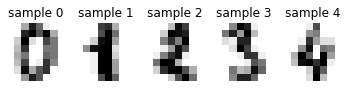

In [5]:
print('total sample count={}'.format(len(digits.images)))

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample %i'% label)



In [6]:
for i in range(5):
    print(i, ' index sample label:', digits.target[i])


0  index sample label: 0
1  index sample label: 1
2  index sample label: 2
3  index sample label: 3
4  index sample label: 4


In [7]:
#훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다.
# 더 나은 방법은 digts.data를 사용하는 것입니다.
# 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다.
# digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.
print(digits.data[0])

X = digits.data
Y = digits.target


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_22612/4084040503.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_22612/4084040503.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype = torch.int64)


Epoch    0/100 cost=2.648979
Epoch   10/100 cost=2.062114
Epoch   20/100 cost=1.836456
Epoch   30/100 cost=1.568906
Epoch   40/100 cost=1.281453
Epoch   50/100 cost=0.992348
Epoch   60/100 cost=0.742211
Epoch   70/100 cost=0.547770
Epoch   80/100 cost=0.411996
Epoch   90/100 cost=0.317954


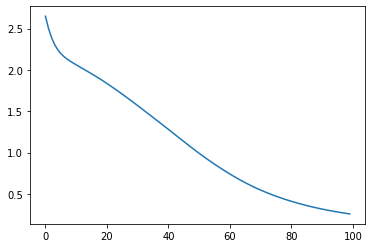

In [10]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_fn =nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses= []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred=model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch%10 == 0 :
        print('Epoch {:4d}/{} cost={:.6f}'.format(epoch, 100, loss.item()))
    losses.append(loss.item())
plt.plot(losses)